<a href="https://colab.research.google.com/github/chenweioh/GCP-Inspector-Toolkit/blob/main/Fraud_Detection_in_BE_Trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#User Guide: Bioequivalence Trial Analysis Tool Version 1.1

## What's New (Version 1.1)
### New Features
1. **Study Design Handling:**
   - The tool now supports 2-period cross-over, 3-period partial replicate, and 4-period full replicate study designs. Users can select the appropriate design during the analysis setup.

2. **Automatic PDF Download:**
   - The tool automatically saves the generated plot as a PDF file, including basic information such as the file name, total subjects, and study design. The PDF is then downloaded automatically to your local machine.

### Important Remark
The subset of subjects or the number of subjects should follow the sequence of subjects being analysed in the bioanalytical lab, instead of the subject number. For example, if subject 3 is analysed first in the lab, then the result from subject 3 should be regarded as subject "1" in this analysis.


###Overview
Welcome to the Bioequivalence Trial Analysis Tool! This user-friendly tool is designed to help detect potential fraudulent activities in bioequivalence trials. Inspired by Anders Fuglsang's research, the tool is implemented based on his third plot method. This guide will walk you through how to use the tool effectively.

## Table of Contents
1. Requirements
2. Getting Started
3. Excel Format
4. Uploading Data
5. Security Warning
6. Running the Analysis
7. Interpreting Results
8. Original Data and Verification
9. Troubleshooting
10. Reference to Original Article
11. Feedback and Contributions


###Requirements
An internet connection to access Google Colab

Data for analysis in Excel (.xlsx) format

###Getting Started
To get started, open this notebook in Google Colab if you haven't already.

###Excel Format
Your Excel data should adhere to the following format and column name for optimal results:

*   Column A: Subj
*   Column B: Seq
*   Column C: Per
*   Column D: Trt
*   Column E: Var

###Important Note:
The subset of subjects or the number of subjects should follow the sequence of subjects being analyzed in the bioanalytical lab, instead of the subject number. For example, if Subject 3 is being analyzed first in the lab, then the result from Subject 3 should be regarded as Subject "1" in this analysis.

###Uploading Data
*   Click the "Play" button next to each code cell to run them one at a time.
*   Alternatively, go to the "Runtime" tab in the menu and select "Run All" to

####Security Warning
When you open this notebook in Google Colab, you may see the following warning:

> "This notebook was not authored by Google. This notebook is being loaded from GitHub. It may request access to your data stored with Google, or read data and credentials from other sessions. Please review the source code before executing this notebook."

This is a standard security warning. Feel free to review the source code in this notebook before proceeding. We take your data privacy seriously and have not included any code that would compromise your personal information.

If you've reviewed the code and feel comfortable with it, you can proceed by clicking 'Run Anyway'.

1. The tool will prompt you to choose the study design:
    - 1: 2-period cross-over
    - 2: 3-period partial replicate
    - 3: 4-period full replicate
2. Select the appropriate option based on your study design.
3. Next, you will see the upload dialog appear below the code cell.
4. Choose your Excel (.xlsx) file and upload it.

###Running the Analysis
Wait for the analysis to complete; this might take a few minutes depending on the size of your data.

###Interpreting Results
Upon successful analysis, the tool will generate plots and tables to help you understand the bioequivalence metrics.

## Automatic PDF Download
The tool will automatically save the generated plot as a PDF file, including basic information such as the file name, total subjects, and study design. The PDF will be downloaded automatically to your local machine.

###Original Data and Verification
For your verification purposes, I have provided a sample of original data which can be accessed at this [link](https://docs.google.com/spreadsheets/d/1JgJ0ooZRjjOD2D9H0cIp3Uq45zku0C8i/edit?usp=drive_link&ouid=102636526263516889334&rtpof=true&sd=true).


The plot for the original data should look like:
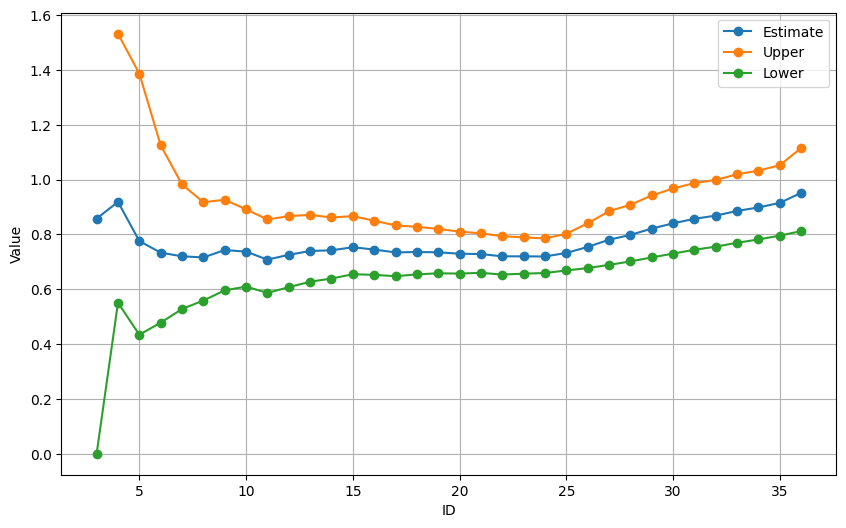

###Troubleshooting
If you encounter errors during data upload, make sure your Excel file is formatted correctly.
If the analysis doesn't run as expected, double-check that you've run all the prerequisite cells in order.

###Reference to Original Article
For a more comprehensive understanding of the methods employed in this tool, you can refer to the original article by Anders Fuglsang. The article provides valuable insights into the methods for detecting fraudulent activities in bioequivalence trials. The original article can be found [here](https://www.sciencedirect.com/science/article/abs/pii/S0928098720303833).

###Feedback and Contributions
If you have suggestions for improvements or find any bugs, please create an issue on the GitHub repository. Contributions are always welcome!

We hope you find this tool useful for your bioequivalence trials analysis. Thank you for using it!

Please choose the study design:
1: 2-period cross-over
2: 3-period partial replicate
3: 4-period full replicate
Enter the number corresponding to the study design (1, 2, or 3): 1
Please upload your Excel file with the required columns: Subj, Seq, Per, Trt, Var.


Saving FuglsangData (1).xlsx to FuglsangData (1).xlsx


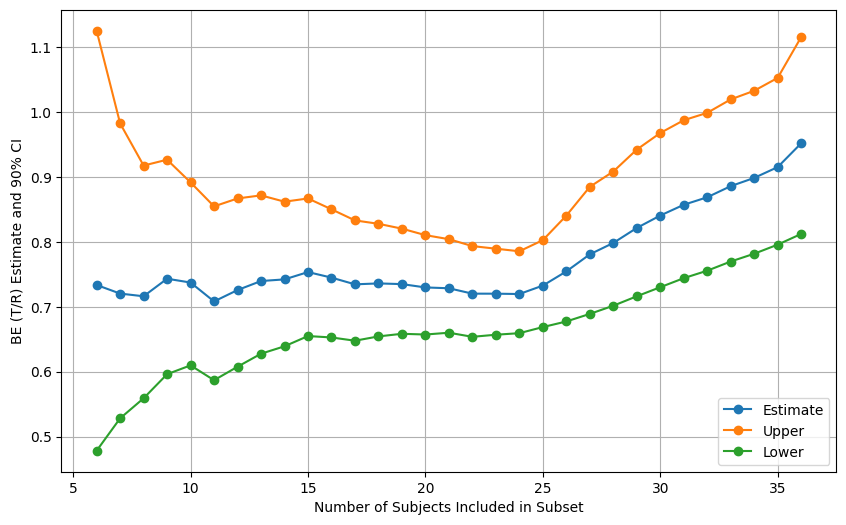

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
from google.colab import files
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

import warnings
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=PerfectSeparationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning, message="divide by zero encountered in double_scalars")

# Function to ask for study design
def ask_study_design():
    while True:
        try:
            print("Please choose the study design:")
            print("1: 2-period cross-over")
            print("2: 3-period partial replicate")
            print("3: 4-period full replicate")
            design = int(input("Enter the number corresponding to the study design (1, 2, or 3): "))
            if design in [1, 2, 3]:
                return design
            else:
                print("Invalid input. Please enter 1, 2, or 3.")
        except ValueError:
            print("Invalid input. Please enter a numeric value (1, 2, or 3).")

# Function to save the plot as a PDF
def save_plot_as_pdf(filename, total_subjects, study_design):
    study_design_info = ("1: 2-period cross-over\n"
                         "2: 3-period partial replicate\n"
                         "3: 4-period full replicate")
    with PdfPages('plot.pdf') as pdf:
        plt.figure(figsize=(10, 6))
        plt.plot(all_data.index + 6, all_data['ratio'], label='Estimate', marker='o')  # adding 6 because the loop starts from 6
        plt.plot(all_data.index + 6, all_data['upper'], label='Upper', marker='o')
        plt.plot(all_data.index + 6, all_data['lower'], label='Lower', marker='o')
        plt.xlabel('Number of Subjects Included in Subset')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.title(f"Study Design: {study_design}")

        # Save the plot
        pdf.savefig()
        plt.close()

        # Create a new page with basic info
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.text(0.5, 0.5, f"File Name: {filename}\nTotal Subjects: {total_subjects}\nStudy Design: {study_design}\n\n{study_design_info}",
                transform=ax.transAxes, fontsize=12, ha='center', va='center')
        ax.axis('off')

        # Save the basic info page
        pdf.savefig(fig)
        plt.close()

    # Download the PDF
    files.download('plot.pdf')

# Ask for the study design
study_design = ask_study_design()

# Upload the Excel file
print("Please upload your Excel file with the required columns: Subj, Seq, Per, Trt, Var.")
uploaded = files.upload()

# Get the filename
uploaded_filename = list(uploaded.keys())[0]

# Read the data from the uploaded Excel file
df = pd.read_excel(uploaded_filename)

# Trim any leading or trailing spaces
df['Trt'] = df['Trt'].str.strip()

# Check if the Excel has the required column headers
required_columns = ['Subj', 'Seq', 'Per', 'Trt', 'Var']

if not all(col in df.columns for col in required_columns):
    print("The Excel file must have the following columns: Subj, Seq, Per, Trt, Var.")
else:
    # Placeholder for storing results
    all_data = pd.DataFrame()
    num_rows = df.shape[0]  # Total number of rows in df

    # Determine the number of subjects based on the study design
    if study_design == 1:
        num_subjects = num_rows // 2
    elif study_design == 2:
        num_subjects = num_rows // 3
    else:
        num_subjects = num_rows // 4

    for n in range(6, num_subjects + 1):  # Automatically set the range based on the number of subjects
        # Subset data based on subject
        sub_df = df[df['Subj'] < n].copy()

        # Apply log transformation
        sub_df['LVar'] = np.log(sub_df['Var'])

        # Fit the generalized linear model
        model = smf.glm("LVar ~ C(Seq)/C(Subj) + C(Per) + C(Trt)", data=sub_df, family=sm.families.Gaussian()).fit()

        # Retrieve the estimate for 'T vs R'
        estimate = model.params['C(Trt)[T.T]']

        # Calculate ratio, upper, and lower
        ratio = np.exp(estimate)
        dfree = n - 2
        ct = -1 * stats.t.ppf(0.05 / 2, dfree)
        stderr = model.bse['C(Trt)[T.T]']
        lower = np.exp(estimate - (ct * stderr))
        upper = np.exp(estimate + (ct * stderr))

        # Store results
        new_row = pd.DataFrame({'ratio': [ratio], 'upper': [upper], 'lower': [lower]})
        all_data = pd.concat([all_data, new_row], ignore_index=True)

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(all_data.index + 6, all_data['ratio'], label='Estimate', marker='o')  # adding 6 because the loop starts from 6
    plt.plot(all_data.index + 6, all_data['upper'], label='Upper', marker='o')
    plt.plot(all_data.index + 6, all_data['lower'], label='Lower', marker='o')
    plt.xlabel('Number of Subjects Included in Subset')
    plt.ylabel('BE (T/R) Estimate and 90% CI')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Save and download the plot as PDF with basic information
    save_plot_as_pdf(uploaded_filename, num_subjects, study_design)
